# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.mode.chained_assignment = None  # Disable warning

In [2]:
# Import the dataset
eda_df = pd.read_csv('eg_database_cleaned.csv')
df = pd.read_csv('eg_database.csv')
eda_df

,PRICE,BEDROOMS,BATHROOMS,FLOORS,INSTALLMENT_YEARS,HAS_INSTALLMENT,REAL_ESTATE_COMPANY,SIZE(SQM),AMENITIES_نادي صحي مشترك,AMENITIES_حارس أمن,AMENITIES_صالة رياضة مشتركة,AMENITIES_حديقة خاصة,AMENITIES_موقف مغطى,AMENITIES_غرفة خادمة,AMENITIES_مسبح خاص,AMENITIES_مطل على بحيرات,AMENITIES_COUNT,LATITUDE,LONGITUDE,PROPERTY_TYPE
0,2000000.0,2,3,2.0,0.0,0,هاب تاون,138,0,0,0,0,0,0,0,0,1,30.051855,31.693232,شقة
1,11696000.0,4,3,-1.0,7.0,1,مونتي نابوليوني,186,1,1,1,0,0,0,0,0,6,30.048424,31.630369,دوبلكس
2,6850000.0,2,2,-1.0,0.0,0,ذا وندر مارك,119,1,1,0,0,0,0,0,0,6,30.048582,31.640852,فيلا
3,3250000.0,3,4,-1.0,10.0,1,ذا وندر مارك,180,1,1,1,1,1,1,1,1,18,30.048582,31.640852,فيلا
4,293550.0,3,2,-1.0,12.0,1,ذا وندر مارك,175,0,1,1,0,1,0,0,1,11,30.048582,31.640852,تاون هاوس
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,3827000.0,2,2,1.0,0.0,0,سراي,128,0,0,0,0,1,0,0,0,2,30.094177,31.704000,شقة
5510,6000000.0,3,3,0.0,0.0,0,مدينة المستقبل,165,0,0,0,0,0,0,0,0,0,30.165251,31.551271,شقة
5511,10000000.0,4,3,-1.0,NaN,0,كمبوندات مدينة المستقبل,210,0,1,0,1,0,1,0,0,7,30.051855,31.693232,فيلا
5512,9500000.0,4,4,-1.0,0.0,0,سراي,260,0,0,0,0,0,0,0,0,0,30.094177,31.704000,فيلا


# EDA

## Numerical Data

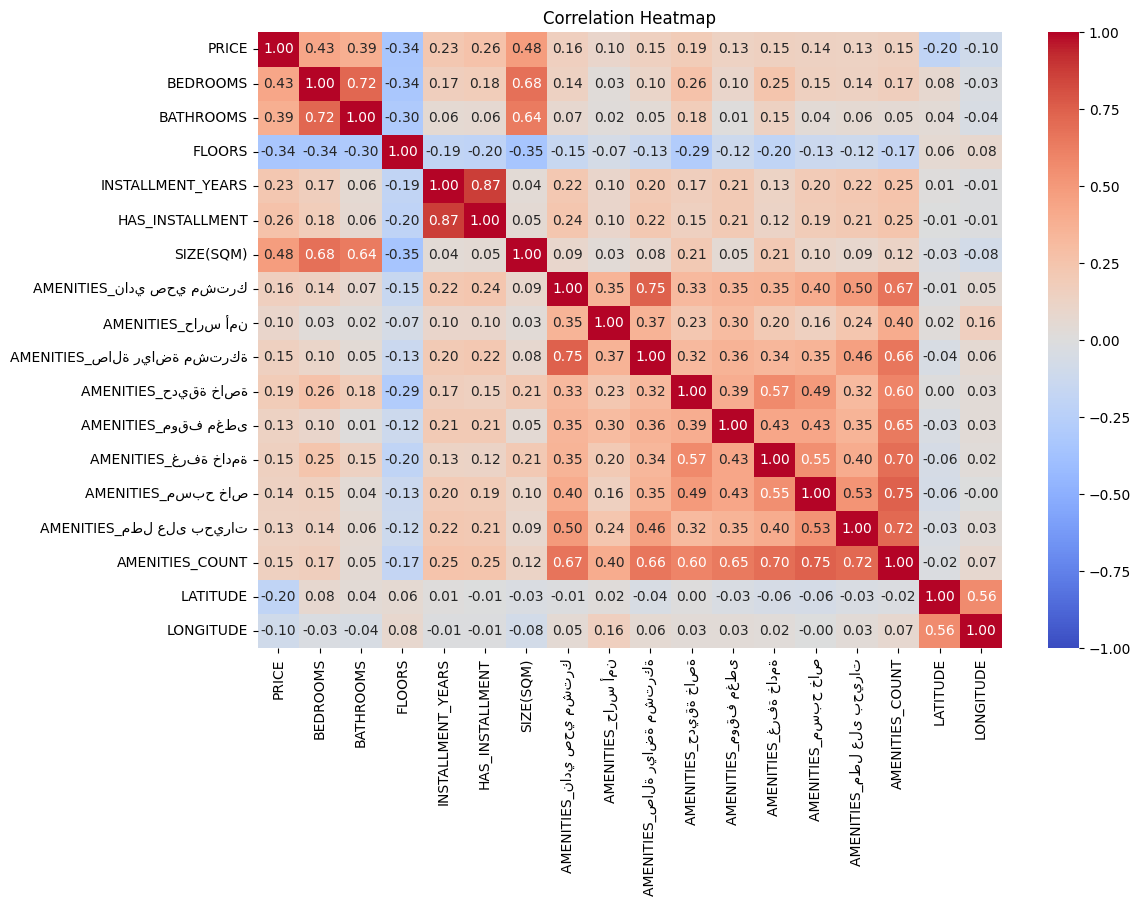

In [3]:
# Select only the numerical columns
numerical_df = eda_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### 1. LATITUDE & LONGITUDE

In [4]:
# Aggregate: Count occurrences & average price per location
df_agg = eda_df.groupby(["LATITUDE", "LONGITUDE"]).agg(
    num_rows=("PRICE", "count"),     # Number of occurrences
    avg_price=("PRICE", "mean")      # Average price
).reset_index()

cairo_lat, cairo_lon =  eda_df["LATITUDE"].mean()  , eda_df["LONGITUDE"].mean()  # Center on Cairo, Egypt


# Create Scatter Map
fig = px.scatter_mapbox(df_agg, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        size="num_rows",   # Number of occurrences as size
                        color="avg_price", # Color by average price
                        color_continuous_scale="bluered",  
                        hover_data=["num_rows", "avg_price"], 
                        mapbox_style="carto-positron", 
                        zoom=11,   # Zoom in to Cairo
                        center={"lat": cairo_lat, "lon": cairo_lon})  # Set Cairo as center
fig.show()

### 2. SIZE(SQM)

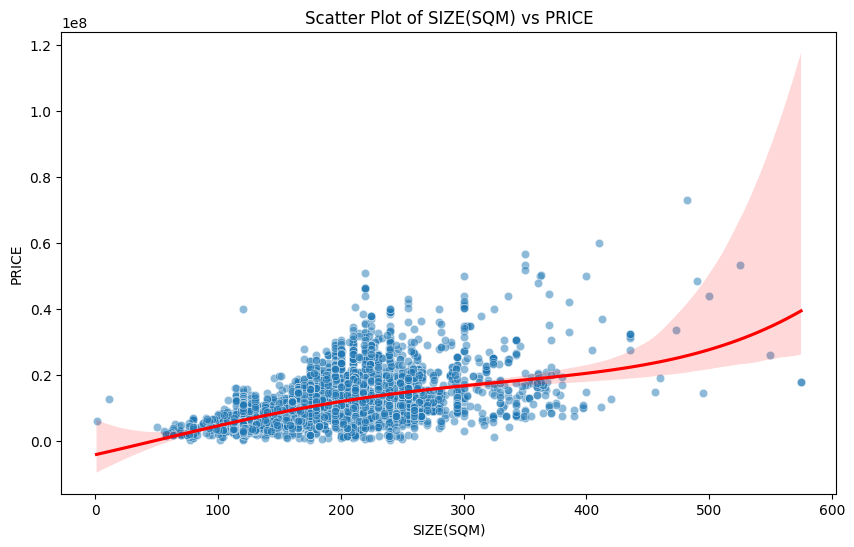

In [5]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eda_df, x='SIZE(SQM)', y='PRICE', alpha=0.5)
sns.regplot(data=eda_df, x='SIZE(SQM)', y='PRICE', scatter=False, color='red', order=4)
plt.title('Scatter Plot of SIZE(SQM) vs PRICE')
plt.xlabel('SIZE(SQM)')
plt.ylabel('PRICE')
plt.show()

In [6]:
# Correlation Coefficient
correlation = eda_df['SIZE(SQM)'].corr(eda_df['PRICE'])
print(f'Correlation Coefficient between SIZE(SQM) and PRICE: {correlation}')

Correlation Coefficient between SIZE(SQM) and PRICE: 0.4806255844129803


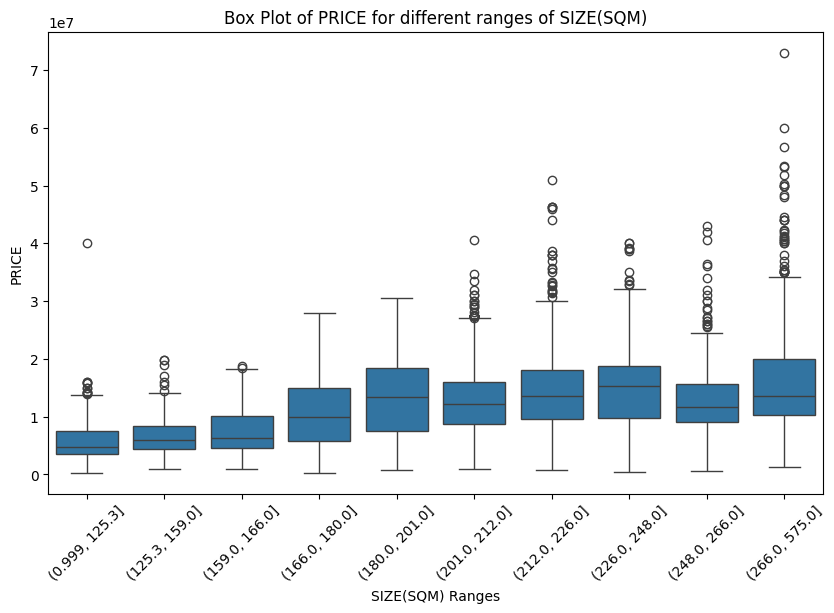

In [7]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=eda_df, x=pd.qcut(eda_df['SIZE(SQM)'], q=10), y='PRICE')
plt.title('Box Plot of PRICE for different ranges of SIZE(SQM)')
plt.xlabel('SIZE(SQM) Ranges')
plt.ylabel('PRICE')
plt.xticks(rotation=45)
plt.show()

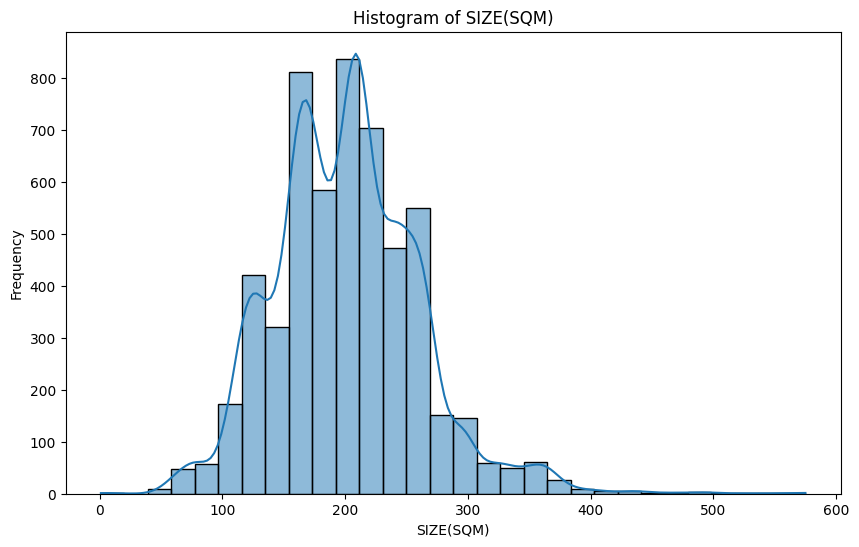

In [8]:
# Histogram of SIZE(SQM)
plt.figure(figsize=(10, 6))
sns.histplot(eda_df['SIZE(SQM)'], bins=30, kde=True)
plt.title('Histogram of SIZE(SQM)')
plt.xlabel('SIZE(SQM)')
plt.ylabel('Frequency')
plt.show()

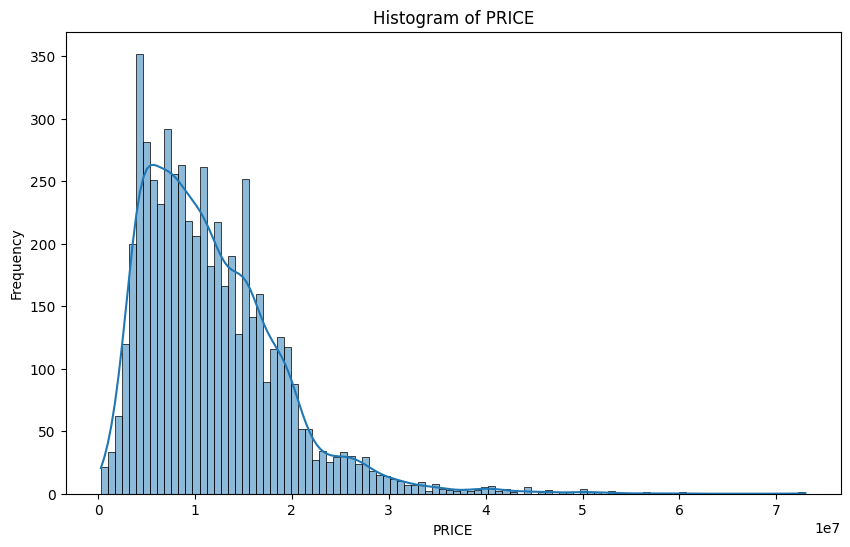

In [9]:
# Histogram of PRICE
plt.figure(figsize=(10, 6))
sns.histplot(eda_df['PRICE'], bins=100, kde=True)
plt.title('Histogram of PRICE')
plt.xlabel('PRICE')
plt.ylabel('Frequency')
plt.show()

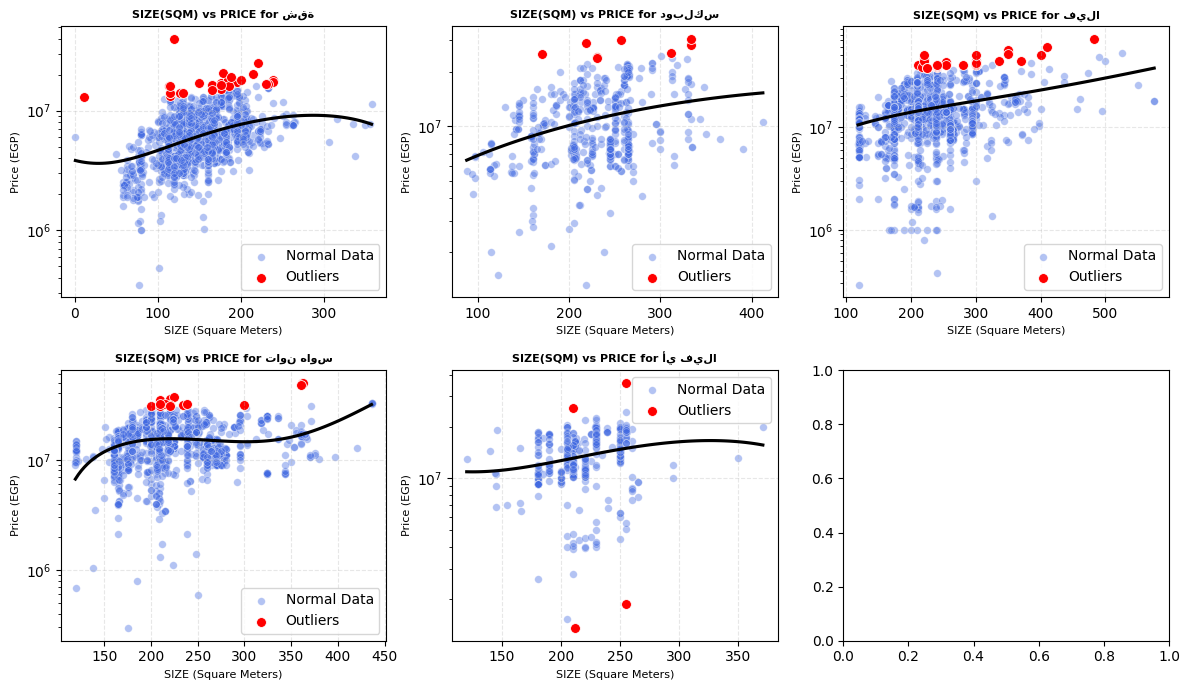

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Function to detect outliers based on regression residuals
def regression_outlier_detection(df, x_col, y_col, threshold=4.2):
    """Detect outliers based on residuals from polynomial regression."""
    # Fit Polynomial Regression (Degree 3)
    X = np.vander(df[x_col], 4)  # Create polynomial features (degree 3)
    model = sm.OLS(df[y_col], X).fit()  # Fit model
    df['predicted_price'] = model.predict(X)  # Get predictions
    df['residual'] = abs(df[y_col] - df['predicted_price'])  # Compute residuals

    # Define outliers as points with residuals above threshold * standard deviation
    std_residual = np.std(df['residual'])
    df['outlier'] = df['residual'] > (threshold * std_residual)
    
    return df

# Get unique property types
property_types = eda_df['PROPERTY_TYPE'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(property_types) // 2, ncols=3, figsize=(12, 7))
axes = axes.flatten()  # Flatten the axes array

# Loop through each property type and create a plot
for ax, property_type in zip(axes, property_types):
    subset_df = eda_df[eda_df['PROPERTY_TYPE'] == property_type].copy()
    
    # Detect outliers using regression residuals
    subset_df = regression_outlier_detection(subset_df, 'SIZE(SQM)', 'PRICE')

    # Scatter Plot for Normal Data
    sns.scatterplot(data=subset_df[~subset_df['outlier']], x='SIZE(SQM)', y='PRICE', 
                    alpha=0.4, s=30, color='royalblue', ax=ax, label='Normal Data')

    # Scatter Plot for Outliers
    sns.scatterplot(data=subset_df[subset_df['outlier']], x='SIZE(SQM)', y='PRICE', 
                    color='red', s=50, label='Outliers', ax=ax)

    # Polynomial Regression Trend Line
    sns.regplot(data=subset_df, x='SIZE(SQM)', y='PRICE', scatter=False, 
                color='black', order=3, ci=None, ax=ax)

    # Improve Labels
    ax.set_title(f'SIZE(SQM) vs PRICE for {property_type}', fontsize=8, fontweight='bold')
    ax.set_xlabel('SIZE (Square Meters)', fontsize=8)
    ax.set_ylabel('Price (EGP)', fontsize=8)
    ax.set_yscale('log')  # Log scale for better price visualization
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()


## BATHROOMS vs SIZE(SQM) & BEDROOMS vs SIZE(SQM)

In [11]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get unique property types
property_types = eda_df['PROPERTY_TYPE'].unique()

for property_type in property_types:
    subset_df = eda_df[eda_df['PROPERTY_TYPE'] == property_type].copy()
    subset_df['INDEX'] = subset_df.index  # Add the index for tooltip

    # Create a subplot with 1 row and 2 columns
    fig = make_subplots(rows=1, cols=2, subplot_titles=[
        f'BATHROOMS vs SIZE(SQM) for {property_type}', 
        f'BEDROOMS vs SIZE(SQM) for {property_type}'
    ])

    # Scatter plot for BATHROOMS vs SIZE(SQM)
    scatter_bathrooms = go.Scatter(
        x=subset_df['SIZE(SQM)'],
        y=subset_df['BATHROOMS'],
        mode='markers',
        marker=dict(size=6, color='blue', opacity=0.3),
        name="Bathrooms",
        hovertemplate="Index: %{customdata}<br>Size: %{x}<br>Bathrooms: %{y}",
        customdata=subset_df['INDEX'],
        
    )

    # Scatter plot for BEDROOMS vs SIZE(SQM)
    scatter_bedrooms = go.Scatter(
        x=subset_df['SIZE(SQM)'],
        y=subset_df['BEDROOMS'],
        mode='markers',
        marker=dict(size=6, color='green', opacity=0.3),
        name="Bedrooms",
        hovertemplate="Index: %{customdata}<br>Size: %{x}<br>Bedrooms: %{y}",
        customdata=subset_df['INDEX'],
        
    )

    # Add traces to the subplot
    fig.add_trace(scatter_bathrooms, row=1, col=1)
    fig.add_trace(scatter_bedrooms, row=1, col=2)

    # Update layout
    fig.update_layout(
        title_text=f"Property Type: {property_type}",
        showlegend=False, 
        height=500, width=1000
    )

    # Show plot
    fig.show()


> We can find here outliers, Next step detect them by combine both bathrooms and bedrooms 

### **Why Mahalanobis is Best for This Use Case**  

#### ❌ **Z-Score & IQR (Univariate Methods)**  
- These methods treat each feature **independently**, ignoring relationships between them.  
- **Why it's wrong?**  
  - A property with **many rooms in a large space** is normal, but in a small space, it's an outlier.  
  - **Z-score/IQR won’t detect this because they check each feature separately.**  

#### ❌ **Euclidean Distance (Basic Distance-Based Methods)**  
- Measures raw distance but doesn’t **account for correlations**.  
- **Why it's wrong?**  
  - A property with **5 rooms in 50 sqm vs. 5 rooms in 300 sqm** will have the same Euclidean distance, but only the first case is unusual.  
  - **Fails to consider how features interact.**  

#### ❌ **DBSCAN, K-Means (Clustering-Based Methods)**  
- Require well-defined clusters, **but real estate data isn’t always clustered** clearly.  
- **Why it's wrong?**  
  - If most houses have 2–5 rooms, DBSCAN might mark all 6+ room houses as outliers, even if they’re normal for larger properties.  
  - **Not reliable for continuous numeric data.**  

#### ❌ **Isolation Forest (Tree-Based Anomaly Detection)**  
- Works well for generic anomalies but **doesn’t consider relationships** between variables.  
- **Why it's wrong?**  
  - Could remove large houses just because they are rare, even if they fit expected size-room trends.  

---

### ✅ **Why Mahalanobis Distance is the Best Choice**  
✔ **Considers correlation** → Recognizes that more rooms are normal for larger properties.  
✔ **Identifies multivariate anomalies** → Flags only combinations that don’t fit expected trends.  
✔ **Robust to scale differences** → Handles "size in sqm" and "room count" together properly.  
✔ **No need for predefined clusters** → Works well even if houses are spread out in feature space.  

👉 **Mahalanobis Distance is the only method that correctly identifies outliers based on feature relationships, making it the best fit for this use case!** 🚀

In [12]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.spatial.distance import mahalanobis

# Create Total Rooms Column
eda_df['TOTAL_ROOMS'] = eda_df['BEDROOMS'] + eda_df['BATHROOMS']

# Function to Calculate Mahalanobis Distance
def mahalanobis_outlier_detection(df, features, threshold=3.9):
    """Detect outliers using Mahalanobis Distance."""
    mean = df[features].mean().values
    cov_matrix = np.cov(df[features].values.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    distances = df[features].apply(lambda x: mahalanobis(x, mean, inv_cov_matrix), axis=1)
    df['outlier'] = distances > threshold  # Mark as outlier if distance > threshold
    return df

# Apply Outlier Detection
eda_df = mahalanobis_outlier_detection(eda_df, ['SIZE(SQM)', 'TOTAL_ROOMS'])

# Get Unique Property Types
property_types = eda_df['PROPERTY_TYPE'].unique()

for property_type in property_types:
    subset_df = eda_df[eda_df['PROPERTY_TYPE'] == property_type].copy()
    subset_df['INDEX'] = subset_df.index  # Add index for tooltips

    # Separate Outliers and Non-Outliers
    df_non_outliers = subset_df[~subset_df['outlier']]
    df_outliers = subset_df[subset_df['outlier']]

    # Create a subplot (Single Scatter Plot)
    fig = go.Figure()

    # Scatter Plot for Non-Outliers
    fig.add_trace(go.Scatter(
        x=df_non_outliers['SIZE(SQM)'],
        y=df_non_outliers['TOTAL_ROOMS'],
        mode='markers',
        marker=dict(size=6, color='blue', opacity=0.4),
        name="Normal Data",
        hovertemplate="Index: %{customdata[0]}<br>Size: %{x} sqm<br>Total Rooms: %{y}<br>Bedrooms: %{customdata[1]}<br>Bathrooms: %{customdata[2]}",
        customdata=np.stack((df_non_outliers['INDEX'], df_non_outliers['BEDROOMS'], df_non_outliers['BATHROOMS']), axis=-1)
    ))

    # Scatter Plot for Outliers
    fig.add_trace(go.Scatter(
        x=df_outliers['SIZE(SQM)'],
        y=df_outliers['TOTAL_ROOMS'],
        mode='markers',
        marker=dict(size=10, color='red', opacity=0.8, symbol='x'),
        name="Outliers",
        hovertemplate="Index: %{customdata[0]}<br>Size: %{x} sqm<br>Total Rooms: %{y}<br>Bedrooms: %{customdata[1]}<br>Bathrooms: %{customdata[2]}",
        customdata=np.stack((df_outliers['INDEX'], df_outliers['BEDROOMS'], df_outliers['BATHROOMS']), axis=-1)
    ))

    # Update Layout
    fig.update_layout(
        title=f"Total Rooms vs Size(SQM) for {property_type}",
        xaxis_title="Size (SQM)",
        yaxis_title="Total Rooms (Bedrooms + Bathrooms)",
        showlegend=True,
        height=500, width=800
    )

    # Show Plot
    fig.show()


----
###  START PREPROCESSING

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.spatial.distance import mahalanobis

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
# ---------------------------
# Custom Transformers for Outlier Detection
# ---------------------------

class MahalanobisOutlierRemover(BaseEstimator, TransformerMixin):
    """
    Detect outliers using Mahalanobis distance for given numerical features.
    Outliers are flagged per PROPERTY_TYPE.
    """
    def __init__(self, features, threshold=4.3):
        self.features = features
        self.threshold = threshold

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        # Ensure X is a DataFrame
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.features)
        
        def compute_mahalanobis(sub_df):
            # Avoid processing empty groups
            if sub_df.empty:
                return sub_df
            mean = sub_df[self.features].mean().values
            cov_matrix = np.cov(sub_df[self.features].values.T)
            inv_cov_matrix = np.linalg.inv(cov_matrix)
            distances = sub_df[self.features].apply(
                lambda x: mahalanobis(x, mean, inv_cov_matrix), axis=1)
            sub_df['outlier'] = distances > self.threshold  # Flag outliers
            return sub_df

        return X.groupby('PROPERTY_TYPE', group_keys=False).apply(compute_mahalanobis)

class RegressionOutlierRemover(BaseEstimator, TransformerMixin):
    """
    Detect outliers using regression residuals.
    For each PROPERTY_TYPE, a polynomial (degree 3) regression is fitted on SIZE(SQM) to predict PRICE.
    Rows with residuals larger than threshold * std are flagged as outliers.
    """
    def __init__(self, x_col, y_col, threshold=4.2):
        self.x_col = x_col
        self.y_col = y_col
        self.threshold = threshold

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        def compute_regression_outliers(sub_df):
            if sub_df.empty:
                return sub_df
            # Create polynomial features (degree 3)
            X_poly = np.vander(sub_df[self.x_col], 4)
            model = sm.OLS(sub_df[self.y_col], X_poly).fit()
            sub_df['predicted_price'] = model.predict(X_poly)
            sub_df['residual'] = abs(sub_df[self.y_col] - sub_df['predicted_price'])
            std_residual = np.std(sub_df['residual'])
            # Combine with any existing 'outlier' flag using bitwise OR
            sub_df['outlier'] = sub_df.get('outlier', False) | (sub_df['residual'] > (self.threshold * std_residual))
            return sub_df

        return X.groupby('PROPERTY_TYPE', group_keys=False).apply(compute_regression_outliers)

# ---------------------------
# Assume you have a cleaned DataFrame `eda_df`
# It must include at least: PROPERTY_TYPE, SIZE(SQM), TOTAL_ROOMS, PRICE
# For example:
# eda_df = pd.read_csv('your_cleaned_data.csv')
# ---------------------------

# ---------------------------
# Stage 1: Outlier Removal Pipeline (DataFrame Level)
# ---------------------------
outlier_pipeline = Pipeline([
    ('mahalanobis_removal', MahalanobisOutlierRemover(features=['SIZE(SQM)', 'TOTAL_ROOMS'], threshold=4.3)),
    ('regression_removal', RegressionOutlierRemover(x_col='SIZE(SQM)', y_col='PRICE', threshold=4.2))
])

# Apply outlier detection on the original DataFrame
num_col = eda_df.select_dtypes(include=[np.number]).columns.tolist()

cat_col = ["PROPERTY_TYPE", "REAL_ESTATE_COMPANY"]
new_eda_df = eda_df.copy()[num_col + cat_col]
df_outlier_checked = outlier_pipeline.fit_transform(new_eda_df)

print(len(new_eda_df))

# Remove rows flagged as outliers (keep only rows where 'outlier' is False)
df_filtered = df_outlier_checked[df_outlier_checked['outlier'] == False].copy()

print(len(df_filtered))
# Separate features and target.
# Drop extra columns generated during outlier detection.
X_filtered = df_filtered.drop(columns=['PRICE', 'outlier', 'predicted_price', 'residual'])
y_filtered = df_filtered['PRICE']

# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
X_train

5514
5398


C:\Users\Osama Mo\AppData\Local\Temp\ipykernel_12132\3787880894.py:48: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Osama Mo\AppData\Local\Temp\ipykernel_12132\3787880894.py:78: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,BEDROOMS,BATHROOMS,FLOORS,INSTALLMENT_YEARS,HAS_INSTALLMENT,SIZE(SQM),AMENITIES_نادي صحي مشترك,AMENITIES_حارس أمن,AMENITIES_صالة رياضة مشتركة,AMENITIES_حديقة خاصة,AMENITIES_موقف مغطى,AMENITIES_غرفة خادمة,AMENITIES_مسبح خاص,AMENITIES_مطل على بحيرات,AMENITIES_COUNT,LATITUDE,LONGITUDE,TOTAL_ROOMS,PROPERTY_TYPE,REAL_ESTATE_COMPANY
4225,4,4,-1.0,0.0,0,365,0,0,0,0,0,0,0,0,1,30.068150,31.628214,8,دوبلكس,نيوبوليس - وادي دجلة
2861,3,5,-1.0,0.0,0,300,0,1,0,1,1,1,0,0,9,30.048582,31.640852,8,فيلا,ذا وندر مارك
632,3,3,-1.0,0.0,0,220,1,1,1,0,1,0,0,1,13,30.057632,31.677578,6,أي فيلا,أليفا
576,3,3,-1.0,0.0,0,265,1,1,1,0,1,0,0,1,12,30.054827,31.618816,6,دوبلكس,لافينير
1994,3,3,-1.0,0.0,0,215,0,1,0,0,0,1,0,0,2,30.070133,31.667019,6,أي فيلا,البوسكو سيتي
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,4,4,-1.0,8.0,1,212,1,1,1,1,1,1,0,1,14,30.094177,31.704000,8,فيلا,سراي
5296,3,3,-1.0,9.0,1,223,0,0,0,0,0,0,0,0,0,30.051855,31.693232,6,دوبلكس,لاميرادا المستقبل
5331,4,3,-1.0,8.0,1,204,1,1,1,1,1,1,1,1,18,30.094177,31.704000,7,دوبلكس,سراي
5506,4,3,-1.0,0.0,0,212,1,1,0,1,1,1,0,0,13,30.094177,31.704000,7,فيلا,سراي


In [14]:
X_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5398 entries, 0 to 5513
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BEDROOMS                     5398 non-null   int64  
 1   BATHROOMS                    5398 non-null   int64  
 2   FLOORS                       5398 non-null   float64
 3   INSTALLMENT_YEARS            5397 non-null   float64
 4   HAS_INSTALLMENT              5398 non-null   int64  
 5   SIZE(SQM)                    5398 non-null   int64  
 6   AMENITIES_نادي صحي مشترك     5398 non-null   int64  
 7   AMENITIES_حارس أمن           5398 non-null   int64  
 8   AMENITIES_صالة رياضة مشتركة  5398 non-null   int64  
 9   AMENITIES_حديقة خاصة         5398 non-null   int64  
 10  AMENITIES_موقف مغطى          5398 non-null   int64  
 11  AMENITIES_غرفة خادمة         5398 non-null   int64  
 12  AMENITIES_مسبح خاص           5398 non-null   int64  
 13  AMENITIES_مطل على بحيرا

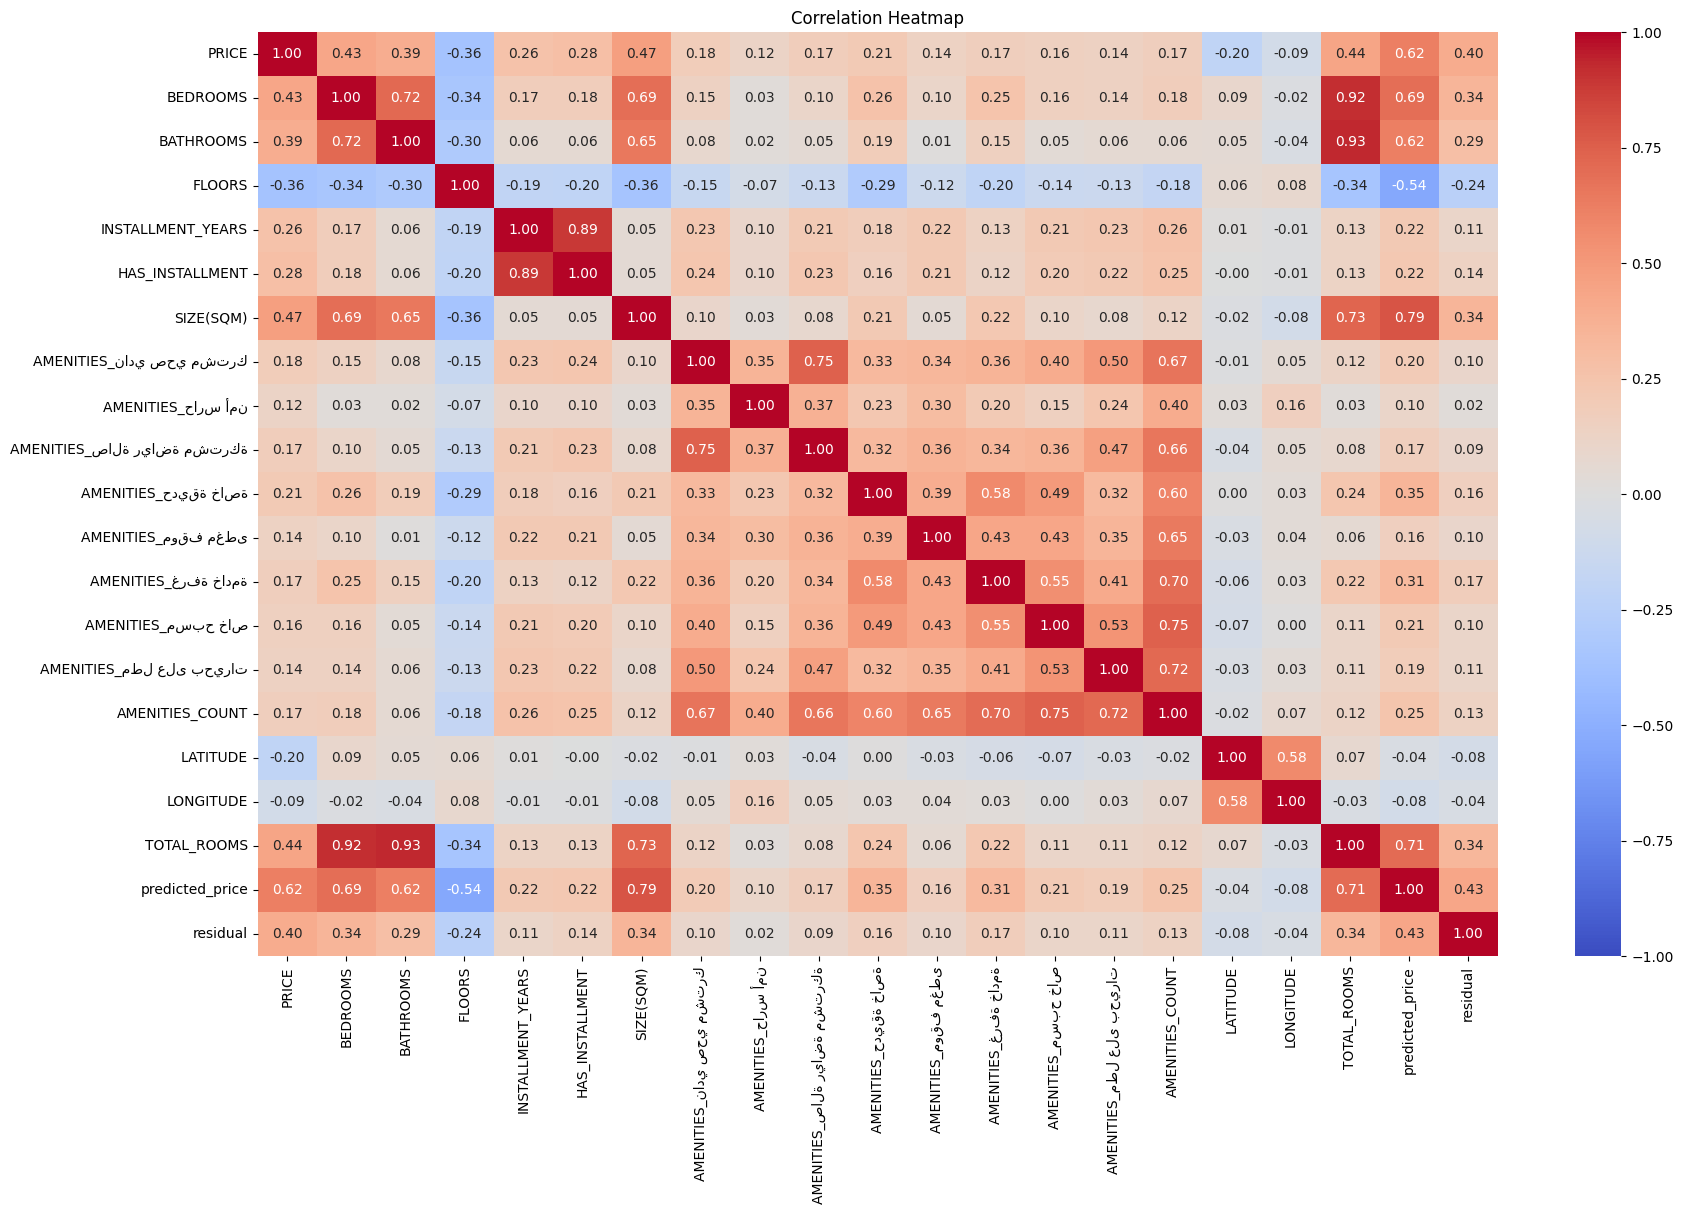

In [15]:
# Select only the numerical columns
numerical_df = df_filtered.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

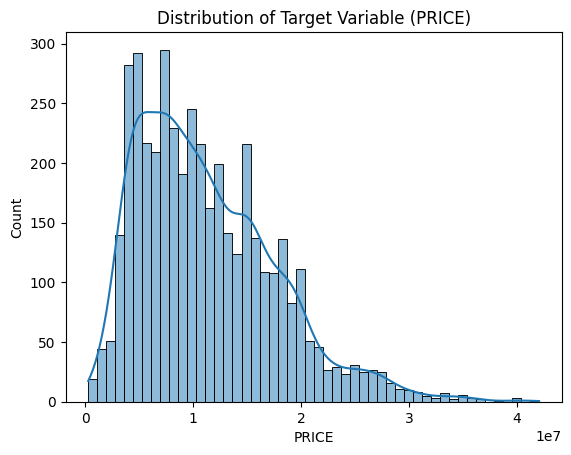

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_train, bins=50, kde=True)
plt.title("Distribution of Target Variable (PRICE)")
plt.show()


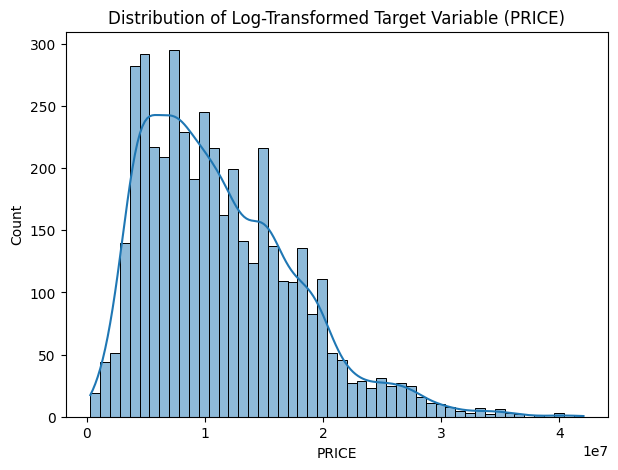

Training stack...
stack RMSE: 3962012.0978
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 4318, number of used features: 34
[LightGBM] [Info] Start training from score 11298774.663270
LightGBM RMSE: 3897482.7234
Training CatBoost...
CatBoost RMSE: 4033899.9331
Training RandomForest...
RandomForest RMSE: 4040091.1078
Training LinearRegression...
LinearRegression RMSE: 4263060.2894
Training Ridge...
Ridge RMSE: 4261314.0948
Training Lasso...


c:\Users\Osama Mo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.657e+15, tolerance: 1.781e+13



Lasso RMSE: 4264790.1177
Training ElasticNet...
ElasticNet RMSE: 4411757.9717
Training SVR...
SVR RMSE: 6328527.4721
Training KNN...
KNN RMSE: 4229532.7579
Training GradientBoosting...
GradientBoosting RMSE: 4086134.6586
Training ExtraTrees...
ExtraTrees RMSE: 4218978.5754
Training HistGradientBoosting...
HistGradientBoosting RMSE: 3913338.8332


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor


# Define features for preprocessing
categorical_features = ['PROPERTY_TYPE', 'REAL_ESTATE_COMPANY']
numerical_features = ["BEDROOMS", "BATHROOMS", "FLOORS", "INSTALLMENT_YEARS", 'HAS_INSTALLMENT', "SIZE(SQM)", "LATITUDE"]

# Log transform the target variable to reduce skewness
# y_train = np.log1p(y_train)
# y_test = np.log1p(y_test)

# Visualize transformed target variable
plt.figure(figsize=(7,5))
sns.histplot(y_train, bins=50, kde=True)
plt.title("Distribution of Log-Transformed Target Variable (PRICE)")
plt.show()

from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer to remove outliers using IQR
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor
        self.lower_bounds_ = None
        self.upper_bounds_ = None
        
    def fit(self, X, y=None):
        q1 = np.percentile(X, 25, axis=0)
        q3 = np.percentile(X, 75, axis=0)
        iqr = q3 - q1
        self.lower_bounds_ = q1 - self.factor * iqr
        self.upper_bounds_ = q3 + self.factor * iqr
        return self
    
    def transform(self, X):
        X = np.clip(X, self.lower_bounds_, self.upper_bounds_)
        return X

# Modified preprocessor with outlier removal
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('outlier_remover', OutlierRemover(factor=1.5)),  # New outlier removal step
            ('scaler', RobustScaler())
        ]), numerical_features)
    ]
)
# Corrected xgb_params assignment
xgb_params = {
    'max_depth': 4,
    'learning_rate': 0.00875,
    'n_estimators': 3515,
    'min_child_weight': 2,
    'colsample_bytree': 0.2050378195385253,
    'subsample': 0.40369887914955715,
    'reg_alpha': 0.3301567121037565,
    'reg_lambda': 0.046181862052743
}

# Use the imported XGBRegressor directly
xgbr = XGBRegressor(**xgb_params, random_state=42)

# Define the base models for stacking
model = [
    ('ridge', Ridge(alpha=15)),
    ('XGB', xgbr),
]

# Update the models dictionary to include the corrected StackingRegressor
models = {
    "stack": StackingRegressor(estimators=model, final_estimator=LinearRegression()),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=100, learning_rate=0.1, verbose=0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, random_state=42),
}

# Train and evaluate each model using RMSE
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model_pipeline.predict(X_test)
    
    # Reverse log transformation
    # y_pred = np.expm1(y_pred)
    # y_actual = np.expm1(y_test)
    # print(y_pred[0:10], y_actual[0:10])
    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} RMSE: {rmse:.4f}")

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, KFold
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Assuming you have these variables already defined:
# X_train, y_train: Your training data
# X_test, y_test: Your testing data

# Identify categorical columns
categorical_features = ['PROPERTY_TYPE', 'REAL_ESTATE_COMPANY']

# Convert categorical columns to category dtype
for col in categorical_features:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype('category')
        X_test[col] = X_test[col].astype('category')

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500, 1000],
    'num_leaves': [31, 50, 70, 90, 120, 150],
    'min_child_samples': [5, 10, 20, 30, 50, 100],
    'max_depth': [-1, 5, 10, 15, 20, 25],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.03, 0.1, 0.3, 1],
    'reg_lambda': [0, 0.001, 0.01, 0.03, 0.1, 0.3, 1],
    'min_split_gain': [0, 0.1, 0.2, 0.3, 0.4],
    'boosting_type': ['gbdt', 'dart', 'goss']
}

# Define evaluation method
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Setup cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create LightGBM dataset with categorical features
# Create indices for categorical features
categorical_feature_indices = [X_train.columns.get_loc(col) for col in categorical_features if col in X_train.columns]

# Create LightGBM dataset
train_data = lgb.Dataset(
    X_train, 
    label=y_train,
    categorical_feature=categorical_feature_indices
)

# Create base LightGBM model
lgb_model = lgb.LGBMRegressor(
    random_state=42, 
    verbose=-1,
    categorical_feature=categorical_feature_indices
)

# Setup RandomizedSearchCV
tuner = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    scoring='neg_root_mean_squared_error',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Execute hyperparameter tuning
print("Starting hyperparameter tuning...")
tuner.fit(X_train, y_train)

# Display best parameters and score
print("Best parameters found:")
print(tuner.best_params_)
print(f"Best RMSE: {-tuner.best_score_:.4f}")

# Evaluate on test set with best model
best_model = tuner.best_estimator_
y_pred = best_model.predict(X_test)
test_rmse = rmse_score(y_test, y_pred)
print(f"Test RMSE with tuned model: {test_rmse:.4f}")

# Feature importance analysis
feature_importance = best_model.feature_importances_
feature_names = X_train.columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features:")
print(importance_df.head(10))

# Save the best model
import joblib
joblib.dump(best_model, 'tuned_lightgbm_model.pkl')
print("Best model saved as 'tuned_lightgbm_model.pkl'")

# Additional analysis: Try one-hot encoding instead of categorical features
print("\nTrying one-hot encoding approach for comparison...")
from sklearn.preprocessing import OneHotEncoder

# Make a copy of the data
X_train_onehot = X_train.copy()
X_test_onehot = X_test.copy()

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
for col in categorical_features:
    if col in X_train.columns:
        # Fit and transform on training data
        encoded_cols = encoder.fit_transform(X_train[[col]])
        # Create new column names
        new_cols = [f"{col}_{int(i)}" for i in range(encoded_cols.shape[1])]
        # Add encoded columns to dataframe
        for i, new_col in enumerate(new_cols):
            X_train_onehot[new_col] = encoded_cols[:,i]
            
        # Transform test data
        encoded_cols_test = encoder.transform(X_test[[col]])
        for i, new_col in enumerate(new_cols):
            X_test_onehot[new_col] = encoded_cols_test[:,i]
        
        # Drop original column
        X_train_onehot = X_train_onehot.drop(col, axis=1)
        X_test_onehot = X_test_onehot.drop(col, axis=1)

# Train a simple model with default hyperparameters to compare approaches
onehot_model = lgb.LGBMRegressor(random_state=42)
onehot_model.fit(X_train_onehot, y_train)
y_pred_onehot = onehot_model.predict(X_test_onehot)
onehot_rmse = rmse_score(y_test, y_pred_onehot)

print(f"One-hot encoding approach RMSE: {onehot_rmse:.4f}")
print(f"Categorical features approach RMSE: {test_rmse:.4f}")
print(f"Better approach: {'One-hot encoding' if onehot_rmse < test_rmse else 'Categorical features'}")

Starting hyperparameter tuning...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Osama Mo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\basic.py:2034: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.



Best parameters found:
{'subsample': 0.7, 'reg_lambda': 0.001, 'reg_alpha': 0.03, 'num_leaves': 150, 'n_estimators': 1000, 'min_split_gain': 0.4, 'min_child_samples': 30, 'max_depth': 15, 'learning_rate': 0.01, 'colsample_bytree': 0.8, 'boosting_type': 'gbdt'}
Best RMSE: 3725726.5272
Test RMSE with tuned model: 3625168.6620

Top 10 most important features:
                Feature  Importance
5             SIZE(SQM)       23040
14      AMENITIES_COUNT       13844
3     INSTALLMENT_YEARS        7160
15             LATITUDE        5341
17          TOTAL_ROOMS        5028
16            LONGITUDE        5003
19  REAL_ESTATE_COMPANY        3843
1             BATHROOMS        3581
2                FLOORS        3300
0              BEDROOMS        2503
Best model saved as 'tuned_lightgbm_model.pkl'

Trying one-hot encoding approach for comparison...


TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

In [ ]:
# Evaluate the model on the test set using RMSE
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 3884149.53


# Cat

In [143]:
# Select all categorical features
categorical_features = eda_df.select_dtypes(include=['object', 'bool']).columns.tolist()
df_categorical = eda_df[categorical_features + ['PRICE']]
df_categorical

,REAL_ESTATE_COMPANY,PROPERTY_TYPE,outlier,PRICE
0,هاب تاون,شقة,False,2000000.0
1,مونتي نابوليوني,دوبلكس,False,11696000.0
2,ذا وندر مارك,فيلا,False,6850000.0
3,ذا وندر مارك,فيلا,False,3250000.0
4,ذا وندر مارك,تاون هاوس,False,293550.0
...,...,...,...,...
5509,سراي,شقة,False,3827000.0
5510,مدينة المستقبل,شقة,False,6000000.0
5511,كمبوندات مدينة المستقبل,فيلا,False,10000000.0
5512,سراي,فيلا,False,9500000.0


In [ ]:
# Convert categorical columns to numeric codes
df_categorical_encoded = df_categorical.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)

# Add the PRICE column to the encoded dataframe
df_categorical_encoded['PRICE'] = eda_df['PRICE']

# Calculate the correlation matrix
correlation_matrix = df_categorical_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between PRICE and Categorical Features')
plt.show()

In [ ]:
# Convert categorical columns to numeric codes
df_categorical_encoded = df_categorical.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)

# Calculate the correlation matrix
correlation_matrix = df_categorical_encoded.corr()

# Check correlation with price
correlation_with_price = correlation_matrix["PRICE"].sort_values(ascending=False)
print(correlation_with_price)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Select all categorical features
categorical_features = eda_df.select_dtypes(include=['object', 'bool']).columns.tolist()
df_categorical = eda_df[categorical_features].apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)
df_categorical

rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(df_categorical, eda_df['PRICE'])

feature_importances = pd.Series(rf.feature_importances_, index=df_categorical.columns)
feature_importances.sort_values(ascending=False, inplace=True)

print(feature_importances)

In [ ]:

# Plot violin plots for each categorical feature against PRICE
plt.figure(figsize=(20, 40))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(8, 4, i)
    sns.violinplot(data=eda_df, x=feature, y='PRICE', palette='Set3', hue=feature)
    # sns.swarmplot(data=eda_df, x=feature, y='PRICE', color='k', alpha=0.6)
    plt.title(f'PRICE vs {feature}');
    plt.xticks(rotation=90);
plt.tight_layout();
plt.show();

In [ ]:
# Calculate the variance for all categorical columns
categorical_variance = eda_df[categorical_features].apply(lambda x: x.astype('category').cat.codes.var()).sort_values(ascending=False)
print(categorical_variance)

In [ ]:
eda_df[categorical_features].describe()

In [ ]:
# Plot violin plots for each categorical feature against PRICE
plt.figure(figsize=(15, 8))
high_corr_cat_columns = high_corr_columns.copy()
high_corr_cat_columns.remove("PRICE")
high_corr_cat_columns += ['AMENITIES_COUNT', "BEDROOMS", "BATHROOMS"]
sampled_df = eda_df.sample(n=100, random_state=42)

for i, feature in enumerate(high_corr_cat_columns, 1):
    plt.subplot(3, 4, i)
    sns.violinplot(data=sampled_df, x=feature, y='PRICE', palette='Set3');
    sns.stripplot(data=sampled_df, x=feature, y='PRICE', color='k', alpha=0.6)
    plt.title(f'PRICE vs {feature}');
    plt.xticks(rotation=90);
plt.tight_layout();
plt.show();

---
---
---

In [31]:
# import sweetviz as sv
# report = sv.analyze([eda_df, 'Train'], target_feat='PRICE')

In [32]:
# show the report in a form of an HTML file
# report.show_html('Report.html')

In [ ]:
high_corr_cat_columns

In [ ]:
eda_df